In [1]:
#libraries used for importing and exploring the data
import pandas as pd

#libraries used for model training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#libraries used for performance evaluation
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

#libraries for data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Default plot size and type
plt.rc("font", size=14)
plt.figure(figsize=(7,5))
plt.gray()

<Figure size 504x360 with 0 Axes>

In [2]:
#load previously saved preprocessed data
df = pd.read_csv("processed_data.csv")

In [3]:
class_labels = ['Non Fraud', 'Fraud']

In [4]:
y = df['Fraud']
X = df.drop(['Fraud'], axis = 1)

### Split Dataset For Training & Testing

In [5]:
#80:20 Split for Training & Testing Data respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

### Model 1: Random Forest Classifier

In [6]:
#RF = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=123, max_leaf_nodes=50)
RF = RandomForestClassifier(n_estimators=50, max_depth=50, random_state=123, max_leaf_nodes=50)
RF = RF.fit(X_train, y_train)
RF

RandomForestClassifier(max_depth=50, max_leaf_nodes=50, n_estimators=50,
                       random_state=123)

In [7]:
y_predRF = RF.predict(X_test)
RFacc = RF.score(X_test, y_test)

In [8]:
print('Accuracy score= {:.4f}'.format(RFacc))

Accuracy score= 0.9121


#### Confusion Matrix Random Forest

confusion matrix


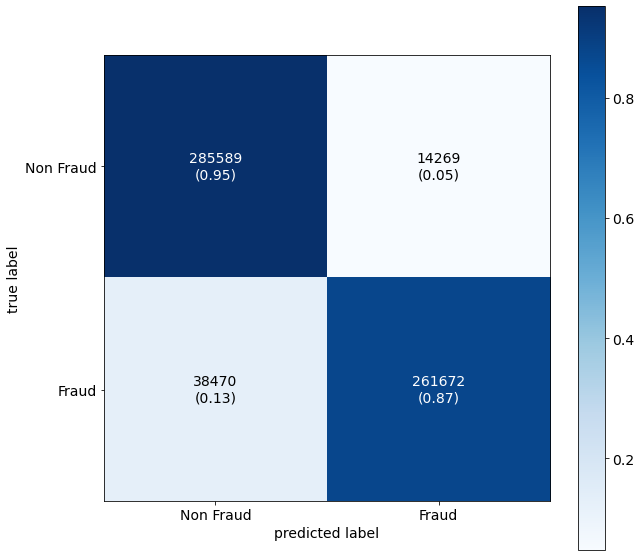

In [9]:
print("confusion matrix")
CMRF=confusion_matrix(y_test, y_predRF)
fig, ax = plot_confusion_matrix(conf_mat=CMRF,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

ax.set_xticklabels([''] + class_labels)
ax.set_yticklabels([''] + class_labels)
plt.show()

#### Classification Report for Random Forest

In [10]:
CRRF=classification_report(y_test, y_predRF, digits =4, target_names= class_labels )
print(CRRF)

              precision    recall  f1-score   support

   Non Fraud     0.8813    0.9524    0.9155    299858
       Fraud     0.9483    0.8718    0.9085    300142

    accuracy                         0.9121    600000
   macro avg     0.9148    0.9121    0.9120    600000
weighted avg     0.9148    0.9121    0.9120    600000



#### AUC for Random Forest

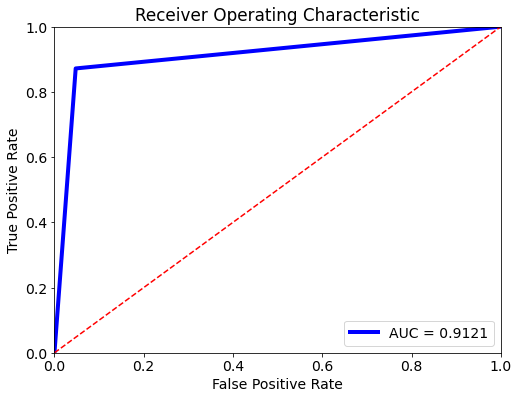

In [11]:
fprRF, tprRF, thresholds = roc_curve(y_test, y_predRF)
roc_auc = auc(fprRF, tprRF)
plt.figure(figsize=[8,6])
plt.title('Receiver Operating Characteristic')
plt.plot(fprRF, tprRF, 'b', linewidth= 4, label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Model 2: Logistic Regression Classifier

In [12]:
LogReg = LogisticRegression(tol = 1e-4, class_weight = "balanced", random_state = 123)
LogReg = LogReg.fit(X_train, y_train)
LogReg

LogisticRegression(class_weight='balanced', random_state=123)

In [13]:
y_predLR = LogReg.predict(X_test)
LRacc=LogReg.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LRacc))

Accuracy score= 0.6576


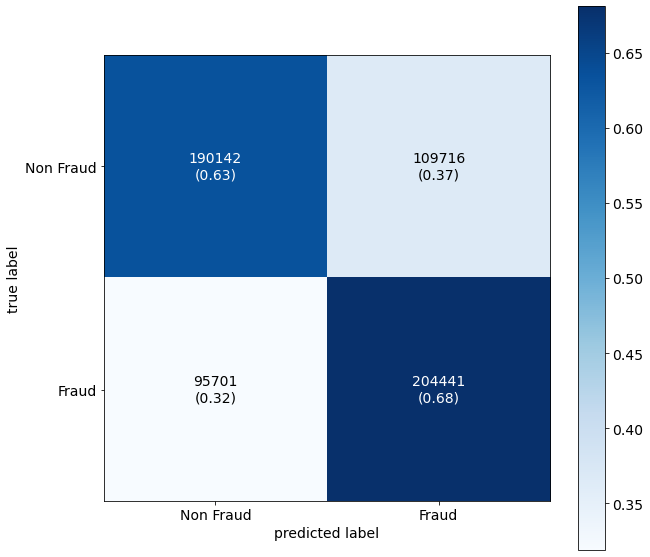

In [14]:
CM=confusion_matrix(y_test, y_predLR)
fig, ax = plot_confusion_matrix(conf_mat=CM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
ax.set_xticklabels([''] + class_labels)
ax.set_yticklabels([''] + class_labels)
plt.show()

#### Classification Report for Logistic Regression

In [15]:
crLR=classification_report(y_test, y_predLR, digits =4, target_names = class_labels )
print(crLR)

              precision    recall  f1-score   support

   Non Fraud     0.6652    0.6341    0.6493    299858
       Fraud     0.6508    0.6811    0.6656    300142

    accuracy                         0.6576    600000
   macro avg     0.6580    0.6576    0.6574    600000
weighted avg     0.6580    0.6576    0.6574    600000



#### AUC for Random Forest

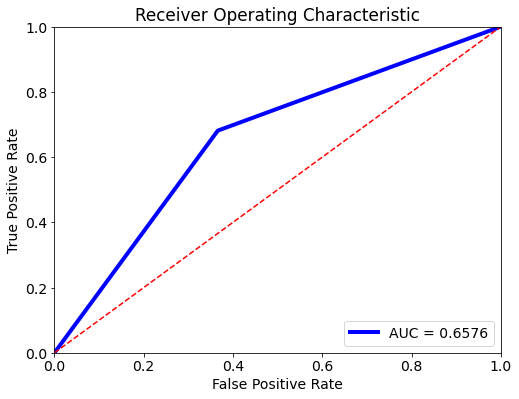

In [16]:
fprLR, tprLR, thresholds = roc_curve(y_test, y_predLR)
roc_auc = auc(fprLR, tprLR)
plt.figure(figsize=[8,6])
plt.title('Receiver Operating Characteristic')
plt.plot(fprLR, tprLR, 'b', linewidth= 4, label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()